# App Reviews Sentiment Analysis

App Reviews Sentiment Analysis means evaluating and understanding the sentiment expressed in user reviews Of mobile applicatiions.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\Anmol Hemani\\OneDrive\\Desktop\\Jupyter\\Test\\linkedin-reviews.csv")

In [3]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


# Exploratory Data Analysis

We will start by analyzing the distributions of ratings. It will provide insight into the overall sentiment of the reviews. Then we can explore further, such as analyzing the length of reviews , and possibly derive insights from the text of the reviews.

# Plotting the Distribution of Ratings

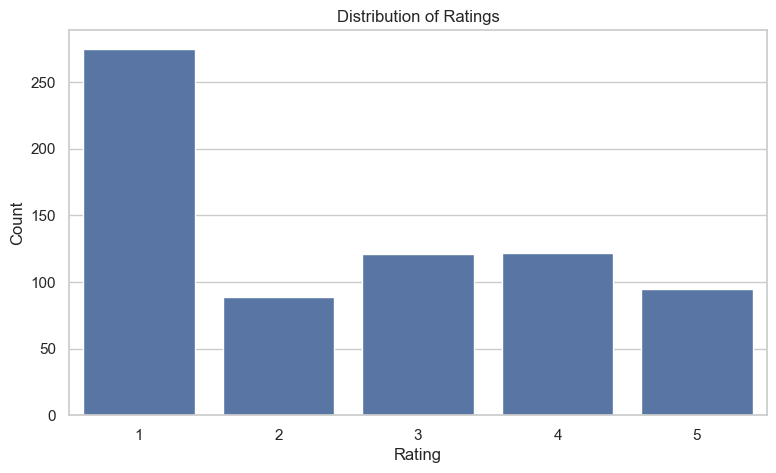

In [7]:
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Adding Sentiment Labels in the Data

We will use Textblob library. Textblob provides a polarity scores raning from -1 (very negative) to 1 (very positive) for a given text. We can use this score to classify each review's sentiment as positive , negative or neutral . 

In [8]:
!pip install textblob


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 41.5/41.5 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------- ---------------- 358.4/624.3 kB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.5 MB 20.5 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 10.0 MB/s eta 0:00:01
   ------------------------------- -------- 1.2/1.5 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.8 MB/s eta 0:00:00
   ----------

In [9]:
from textblob import TextBlob

In [10]:
def textblob_sentiment_analysis(review):
    sentiment=TextBlob(review).sentiment
    if sentiment.polarity>0.1:
        return 'Positive'
    elif sentiment.polarity<-0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [11]:
df['Sentiment']=df['Review'].apply(textblob_sentiment_analysis)

In [12]:
df.sample(5)

,Review,Rating,Sentiment
298,"Force closes, wont let me even open.",1,Neutral
174,Missing support for group.,4,Negative
218,Loses one star because of the inability to edi...,4,Negative
231,"Good connectivity, lack of groups is a pain so...",4,Positive
169,Cannot even sign in- Galaxy ace,1,Neutral


# Analyzing App Reviews Sentiments

In [13]:
sentiment_distributions=df['Sentiment'].value_counts()
sentiment_distributions

Sentiment
Neutral     300
Positive    295
Negative    107
Name: count, dtype: int64

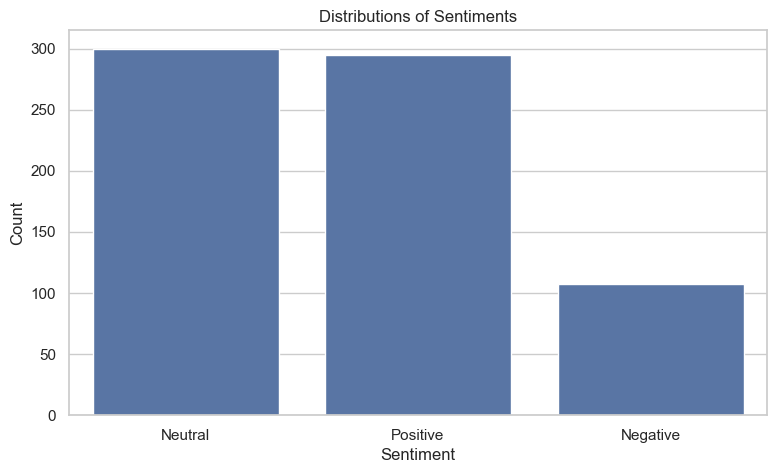

In [15]:
plt.figure(figsize=(9,5))
sns.barplot(x=sentiment_distributions.index,
           y=sentiment_distributions.values)
plt.title('Distributions of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

So , we can see althrough the app has Iow ratings , still the reviewers don't use many negative words in the reviews for the app.

Next, we'll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and numerical ratings.

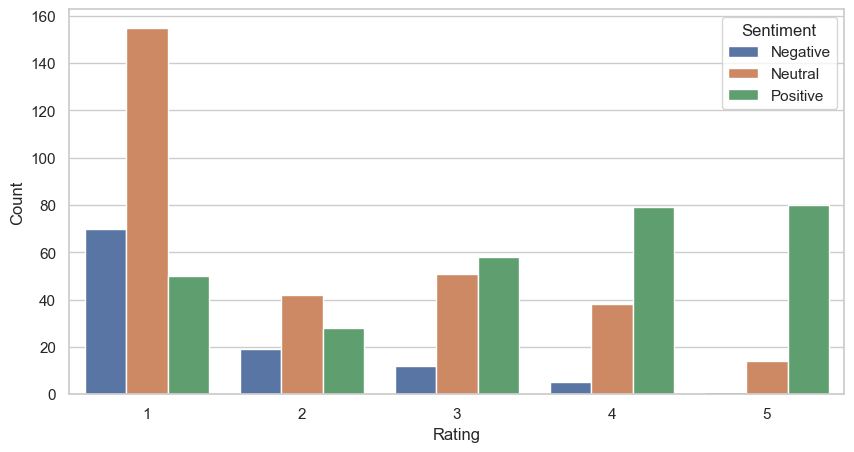

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,
             x='Rating',
             hue='Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Summary

App Reviews Sentiment Analysis is a valuable tool for app developers and business to understand user feedback, prioritize feature updates and maintain a positive user community. It involves using data analysis techniques to determine whether the sentiments in these reviews are positive , negative or neutral.